# Femicides in Argentina

## Analizing the dataset

The data is located in the `registro-de-femicidios-2018-04-13.csv` CSV file. 


- **number**: _case number_ (continuous).
- **age**: _victim's age_ (continuous).
- **gender_identity**: _victim's gender identity_: mujer, transgenero, trans femenina, hombre, travesti, mujer lesbiana (string).
- **victim_type**: _if the victim is the real objective or a related person of the victim_: principal, vinculado (string).
- **province**: _where the femicide happen_: Buenos Aires, Chaco, Tucuman, Neuquen, Salta, Mendoza, Córdoba, Jujuy, Ciudad de Buenos Aires, Santa Fe, Corrientes, Chubut, Misiones, Santa Cruz, San Luis, Santiago del Estero, La Rioja, Catamarca, Formosa, Entre Rios, San Juan, Rio Negro, La Pampa,Tierra del Fuego (string).
- **murder_type**: _how the victim was killed. Could be one single value or a combination_: quemaduras, empalamiento, acuchillamiento, golpes, abuso sexual, asfixia, estrangulamiento, atropellamiento, disparo de bala, apuñalamiento, degollamiento, ahorcamiento, descuartizamiento, desbarrancamiento, otros (string).
- **date**: _when the femicide happen_ (date).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(rc={'figure.figsize': (18, 6)})

In [3]:
df = pd.read_table('registro-de-femicidios-2018-04-13.csv', sep=',', engine='python', names = ['Case', 'Age', 'Gender identity', 'Victim type', 'Province', 'Murder type', 'Date'])
df.head()

,Case,Age,Gender identity,Victim type,Province,Murder type,Date
0,1108,8,MUJER,VINCULADO,Buenos Aires,QUEMADURAS -,2018-04-06
1,1108,11,MUJER,VINCULADO,Buenos Aires,QUEMADURAS -,2018-04-06
2,1108,31,MUJER,PRINCIPAL,Buenos Aires,QUEMADURAS -,2018-04-06
3,1107,22,MUJER,PRINCIPAL,Chaco,ASFIXIA - DEGOLLAMIENTO -,2018-04-15
4,1107,18,MUJER,PRINCIPAL,Chaco,ASFIXIA - DEGOLLAMIENTO -,2018-04-15


In [4]:
df['Murder type'] = df['Murder type'].str.rstrip(' -')

In [5]:
df.dtypes

Case                int64
Age                object
Gender identity    object
Victim type        object
Province           object
Murder type        object
Date               object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 7 columns):
Case               1076 non-null int64
Age                1076 non-null object
Gender identity    1076 non-null object
Victim type        1076 non-null object
Province           1076 non-null object
Murder type        1076 non-null object
Date               1076 non-null object
dtypes: int64(1), object(6)
memory usage: 58.9+ KB


## Searching for junk data

In [7]:
df.isnull().any()

Case               False
Age                False
Gender identity    False
Victim type        False
Province           False
Murder type        False
Date               False
dtype: bool

In [8]:
df['Age'].unique()

array(['8', '11', '31', '22', '18', '21', '30', '47', '23', '26', '69',
       '44', '20', '59', '43', '32', '7', '51', '25', '14', '60', '54',
       '45', '27', '38', '64', '49', '19', '52', '50', '53', '4', '16',
       'Sin datos', '35', '34', '41', '39', '24', '17', '74', '42', '1',
       '75', '36', '2', '33', '37', '29', '62', '40', '13', '0', '65',
       '46', '80', '67', '55', '73', '66', '999', '10', '3', '15', '48',
       '56', '78', '12', '9', '28', '70', '5', '90', '63', '58', '71',
       '57', '81', '85', '68', '61', '6', '86', '83'], dtype=object)

In [9]:
df['Age'].value_counts()

Sin datos    51
22           39
25           38
21           36
23           36
26           34
19           31
18           29
34           29
27           28
16           28
17           28
20           28
43           27
35           26
36           25
32           25
31           24
38           24
24           24
30           23
40           22
29           22
39           20
42           18
44           18
50           17
41           17
33           15
28           15
             ..
65            4
2             4
4             4
67            4
60            4
69            3
1             3
62            3
73            3
59            3
0             2
78            2
70            2
9             2
66            2
999           2
71            2
5             2
57            2
74            2
75            1
86            1
83            1
90            1
6             1
85            1
80            1
61            1
81            1
68            1
Name: Age, Length: 84, d

In [10]:
df.loc[df['Age'] == 'Sin datos', 'Age'].count()

51

In [11]:
df['Gender identity'].unique()

array(['MUJER', 'HOMBRE', 'TRANSGENERO', 'Sin datos', 'TRANS FEMENINA',
       'TRAVESTI', 'MUJER LESBIANA'], dtype=object)

In [12]:
df['Gender identity'].value_counts()

MUJER             958
Sin datos          49
HOMBRE             39
TRAVESTI           19
TRANS FEMENINA      7
TRANSGENERO         3
MUJER LESBIANA      1
Name: Gender identity, dtype: int64

In [13]:
df.loc[df['Gender identity'] == 'Sin datos', 'Gender identity'].count()

49

In [14]:
df['Province'].unique()

array(['Buenos Aires', 'Chaco', 'Tucuman', 'Neuquen', 'Salta', 'Mendoza',
       'Córdoba', 'Jujuy', 'Ciudad de Buenos Aires', 'Santa Fe',
       'Corrientes', 'Chubut', 'Misiones', 'Santa Cruz', 'San Luis',
       'Santiago del Estero', 'La Rioja', 'Catamarca', 'Formosa',
       'Entre Rios', 'San Juan', 'Sin datos', 'Rio Negro', 'La Pampa',
       'Tierra del Fuego'], dtype=object)

In [15]:
df['Victim type'].unique()

array(['VINCULADO', 'PRINCIPAL'], dtype=object)

In [16]:
df['Victim type'].value_counts()

PRINCIPAL    969
VINCULADO    107
Name: Victim type, dtype: int64

In [17]:
df.loc[df['Victim type'] == 'Sin datos', 'Victim type'].count()

0

In [18]:
df['Murder type'].unique()

array(['QUEMADURAS', 'ASFIXIA - DEGOLLAMIENTO', 'ASFIXIA',
       'DISPARO DE BALA', 'ACUCHILLAMIENTO', 'GOLPES - OTROS', 'GOLPES',
       'DEGOLLAMIENTO', 'ESTRANGULAMIENTO - ABUSO SEXUAL',
       'GOLPES - ESTRANGULAMIENTO', 'GOLPES - QUEMADURAS',
       'ESTRANGULAMIENTO - QUEMADURAS', 'GOLPES - DISPARO DE BALA',
       'OTROS', 'ESTRANGULAMIENTO', 'GOLPES - AHORCAMIENTO',
       'AHORCAMIENTO - ABUSO SEXUAL', 'ABUSO SEXUAL', 'Sin datos',
       'AHORCAMIENTO', 'GOLPES - ASFIXIA', 'APUÑALAMIENTO',
       'DESCUARTIZAMIENTO', 'GOLPES - ESTRANGULAMIENTO - ABUSO SEXUAL',
       'ENVENENAMIENTO', 'ACUCHILLAMIENTO - QUEMADURAS',
       'ASFIXIA - QUEMADURAS', 'ACUCHILLAMIENTO - DISPARO DE BALA',
       'GOLPES - DESCUARTIZAMIENTO', 'ATROPELLAMIENTO',
       'ACUCHILLAMIENTO - GOLPES', 'GOLPES - ABUSO SEXUAL',
       'DESBARRANCAMIENTO', 'DISPARO DE BALA - GOLPES', 'Empalamiento',
       'QUEMADURAS - ACUCHILLAMIENTO', 'GOLPES - ACUCHILLAMIENTO',
       'DISPARO DE BALA - DISPARO DE BALA'

In [19]:
df['Murder type'].value_counts()

DISPARO DE BALA                                             236
ACUCHILLAMIENTO                                             192
GOLPES                                                      118
Sin datos                                                   110
ESTRANGULAMIENTO                                             52
QUEMADURAS                                                   50
APUÑALAMIENTO                                                49
ASFIXIA                                                      26
DEGOLLAMIENTO                                                22
GOLPES - ACUCHILLAMIENTO                                     18
OTROS                                                        18
AHORCAMIENTO                                                 18
OTROS - GOLPES                                               12
ESTRANGULAMIENTO - GOLPES                                    10
OTROS - ESTRANGULAMIENTO                                      8
DESCUARTIZAMIENTO                       

In [20]:
df.loc[df['Murder type'] == 'Sin datos', 'Murder type'].count()

110

In [21]:
df['Date'].unique()

array(['2018-04-06', '2018-04-15', '2018-02-28', '2018-03-25',
       '2016-09-14', '2018-04-02', '2018-03-30', '2018-01-14',
       '2018-03-29', '2018-03-26', '2013-02-10', '2018-02-05',
       '2018-03-08', '2018-03-02', '2018-02-20', '2018-02-25',
       '2018-02-13', '2018-02-10', '2018-02-14', '2018-02-08',
       '2018-02-09', '2018-02-04', '2018-02-22', '2017-12-28',
       '2018-02-01', '2017-05-05', '2018-01-28', '2018-01-24',
       '2018-01-22', '2018-01-15', '2017-03-07', '2018-01-02',
       '2017-12-17', '2017-12-24', '2017-12-29', '2018-01-04',
       '2017-11-21', '2018-12-29', '2017-12-25', '2017-09-12',
       '2018-01-06', '2017-12-13', '2018-01-11', '2017-12-18',
       '2018-01-10', '2018-01-08', '2017-09-23', '2017-12-19',
       '2017-12-07', '2017-12-08', '2014-11-16', '2017-09-20',
       '2017-12-09', 'Sin datos', '2017-12-02', '2017-12-11',
       '2017-11-27', '2017-12-06', '2015-02-09', '2017-12-01',
       '2014-03-28', '2015-11-15', '2017-11-25', '2017-1

In [22]:
df['Date'].value_counts()

Sin datos     36
2014-05-10     8
2017-02-20     5
2016-09-13     5
2017-02-05     5
2017-12-29     5
2016-12-25     5
2017-12-08     4
2016-10-23     4
2016-02-07     4
2016-11-07     4
2014-09-21     4
2015-02-23     4
2014-02-19     4
2013-10-26     4
2017-10-24     3
2016-10-09     3
2013-01-13     3
2016-12-02     3
2017-02-12     3
2016-03-13     3
2016-04-24     3
2017-02-15     3
2017-04-02     3
2014-08-14     3
2014-11-23     3
2017-09-09     3
2018-04-06     3
2018-02-13     3
2017-03-22     3
              ..
2017-04-08     1
2013-02-09     1
2017-01-21     1
2016-12-01     1
2016-10-03     1
2016-04-27     1
2014-07-06     1
2017-07-05     1
2013-01-27     1
2017-11-11     1
2013-03-07     1
2016-05-14     1
2017-08-19     1
2015-07-18     1
2014-04-05     1
2016-06-13     1
2014-06-29     1
2014-12-11     1
2017-05-07     1
2015-05-02     1
2016-02-06     1
2017-12-02     1
2015-04-15     1
2015-08-19     1
2017-03-18     1
2015-04-11     1
2017-01-04     1
2014-07-13    

## Converting to NaN

In [23]:
df.replace({
    'Age': { 'Sin datos': np.nan, '999': np.nan },
    'Gender identity': { 'Sin datos': np.nan },
    'Victim type': { 'Sin datos': np.nan },
    'Murder type': { 'Sin datos': np.nan },
    'Date': { 'Sin datos': np.nan }
}, inplace=True)

In [24]:
df.isnull().any()

Case               False
Age                 True
Gender identity     True
Victim type        False
Province           False
Murder type         True
Date                True
dtype: bool

In [25]:
df.shape

(1076, 7)

In [26]:
df[df.isnull().any(axis=1)].shape

(198, 7)

## Fillna and removing junk data

In [27]:
df = df.dropna(subset=['Gender identity'])

In [28]:
df['Age'] = df['Age'].astype(float)

In [29]:
df['Age'].mean()

32.09368635437882

In [30]:
age_mean = round(df['Age'].mean())
age_mean

32

In [31]:
df['Age'] = df['Age'].fillna(value=age_mean)

In [32]:
df['Age'] = df['Age'].astype(int)

In [33]:
df.dropna(axis=0, how='any', inplace=True)

In [34]:
df.isnull().any()

Case               False
Age                False
Gender identity    False
Victim type        False
Province           False
Murder type        False
Date               False
dtype: bool

In [35]:
df

,Case,Age,Gender identity,Victim type,Province,Murder type,Date
0,1108,8,MUJER,VINCULADO,Buenos Aires,QUEMADURAS,2018-04-06
1,1108,11,MUJER,VINCULADO,Buenos Aires,QUEMADURAS,2018-04-06
2,1108,31,MUJER,PRINCIPAL,Buenos Aires,QUEMADURAS,2018-04-06
3,1107,22,MUJER,PRINCIPAL,Chaco,ASFIXIA - DEGOLLAMIENTO,2018-04-15
4,1107,18,MUJER,PRINCIPAL,Chaco,ASFIXIA - DEGOLLAMIENTO,2018-04-15
5,1106,21,MUJER,PRINCIPAL,Buenos Aires,ASFIXIA,2018-02-28
6,1105,30,MUJER,PRINCIPAL,Buenos Aires,DISPARO DE BALA,2018-03-25
7,1104,47,MUJER,PRINCIPAL,Buenos Aires,ACUCHILLAMIENTO,2016-09-14
8,1103,23,MUJER,PRINCIPAL,Buenos Aires,ACUCHILLAMIENTO,2018-04-02
9,1102,26,MUJER,PRINCIPAL,Tucuman,GOLPES - OTROS,2018-03-30


In [36]:
df.dtypes

Case                int64
Age                 int64
Gender identity    object
Victim type        object
Province           object
Murder type        object
Date               object
dtype: object

## Converting types

In [37]:
df['Age'] = pd.to_numeric(df['Age'])

In [38]:
df['Date'] = pd.to_datetime(df['Date'])

In [39]:
df['Gender identity'] = df['Gender identity'].str.capitalize()

In [40]:
df['Victim type'] = df['Victim type'].str.capitalize()

In [41]:
df['Murder type'] = df['Murder type'].str.title()

In [42]:
df.head()

,Case,Age,Gender identity,Victim type,Province,Murder type,Date
0,1108,8,Mujer,Vinculado,Buenos Aires,Quemaduras,2018-04-06
1,1108,11,Mujer,Vinculado,Buenos Aires,Quemaduras,2018-04-06
2,1108,31,Mujer,Principal,Buenos Aires,Quemaduras,2018-04-06
3,1107,22,Mujer,Principal,Chaco,Asfixia - Degollamiento,2018-04-15
4,1107,18,Mujer,Principal,Chaco,Asfixia - Degollamiento,2018-04-15


In [43]:
df.dtypes

Case                        int64
Age                         int64
Gender identity            object
Victim type                object
Province                   object
Murder type                object
Date               datetime64[ns]
dtype: object

## Adding some new info (from the current info)

In [44]:
df['Day of week'] = df['Date'].dt.weekday_name
df.head()

,Case,Age,Gender identity,Victim type,Province,Murder type,Date,Day of week
0,1108,8,Mujer,Vinculado,Buenos Aires,Quemaduras,2018-04-06,Friday
1,1108,11,Mujer,Vinculado,Buenos Aires,Quemaduras,2018-04-06,Friday
2,1108,31,Mujer,Principal,Buenos Aires,Quemaduras,2018-04-06,Friday
3,1107,22,Mujer,Principal,Chaco,Asfixia - Degollamiento,2018-04-15,Sunday
4,1107,18,Mujer,Principal,Chaco,Asfixia - Degollamiento,2018-04-15,Sunday


In [45]:
bins = [0, 13, 21, 35, 45, 65, 100]
age_ranges = pd.cut(df['Age'], bins, labels=['0-13', '13-21', '21-35', '35-45', '45-65', '65+'])

df['Age range'] = age_ranges
df.head()

,Case,Age,Gender identity,Victim type,Province,Murder type,Date,Day of week,Age range
0,1108,8,Mujer,Vinculado,Buenos Aires,Quemaduras,2018-04-06,Friday,0-13
1,1108,11,Mujer,Vinculado,Buenos Aires,Quemaduras,2018-04-06,Friday,0-13
2,1108,31,Mujer,Principal,Buenos Aires,Quemaduras,2018-04-06,Friday,21-35
3,1107,22,Mujer,Principal,Chaco,Asfixia - Degollamiento,2018-04-15,Sunday,21-35
4,1107,18,Mujer,Principal,Chaco,Asfixia - Degollamiento,2018-04-15,Sunday,13-21


## Converting some to categorycal data

In [46]:
df['Victim type'].nbytes

7280

In [47]:
df['Victim type'] = df['Victim type'].astype('category')

In [48]:
df['Victim type'].nbytes

926

In [49]:
df['Gender identity'].nbytes

7280

In [50]:
df['Gender identity'] = df['Gender identity'].astype('category')

In [51]:
df['Gender identity'].nbytes

958

In [52]:
df['Age range'].nbytes

958

In [53]:
df['Age range'] = df['Age range'].astype('category')

In [54]:
df['Age range'].nbytes

958

In [55]:
df['Day of week'].nbytes

7280

In [56]:
df['Day of week'] = df['Day of week'].astype('category')

In [57]:
df['Day of week'].nbytes

966

In [58]:
df.head()

,Case,Age,Gender identity,Victim type,Province,Murder type,Date,Day of week,Age range
0,1108,8,Mujer,Vinculado,Buenos Aires,Quemaduras,2018-04-06,Friday,0-13
1,1108,11,Mujer,Vinculado,Buenos Aires,Quemaduras,2018-04-06,Friday,0-13
2,1108,31,Mujer,Principal,Buenos Aires,Quemaduras,2018-04-06,Friday,21-35
3,1107,22,Mujer,Principal,Chaco,Asfixia - Degollamiento,2018-04-15,Sunday,21-35
4,1107,18,Mujer,Principal,Chaco,Asfixia - Degollamiento,2018-04-15,Sunday,13-21


## Some info

In [59]:
df.shape

(910, 9)

In [60]:
df['Case'].unique()

array([1108, 1107, 1106, 1105, 1104, 1103, 1102, 1101, 1100, 1098, 1097,
       1096, 1094, 1092, 1091, 1090, 1089, 1088, 1087, 1086, 1085, 1084,
       1083, 1082, 1081, 1080, 1079, 1078, 1077, 1076, 1074, 1073, 1072,
       1071, 1070, 1068, 1067, 1066, 1065, 1064, 1061, 1062, 1060, 1059,
       1058, 1057, 1055, 1054, 1053, 1052, 1051, 1050, 1049, 1048, 1047,
       1046, 1045, 1044, 1043, 1042, 1041, 1039, 1038, 1037, 1036, 1035,
       1034, 1033, 1032, 1031, 1030, 1028, 1027, 1026, 1025, 1024, 1023,
       1022, 1020, 1021, 1019, 1018, 1017, 1016, 1015, 1014, 1013, 1012,
       1011, 1010, 1009, 1008, 1007, 1006, 1005, 1004, 1003, 1002, 1001,
       1000,  999,  998,  997,  996,  995,  994,  993,  992,  991,  990,
        989,  978,  987,  986,  985,  984,  983,  982,  981,  980,  979,
        977,  976,  975,  974,  973,  972,  971,  970,  969,  967,  966,
        965,  964,  962,  961,  959,  958,  957,  956,  955,  954,  953,
        952,  951,  950,  947,  946,  944,  943,  9

In [61]:
victims_by_case = df.groupby('Case')
victims_by_case['Victim type'].nunique()

Case
1       1
2       1
3       1
4       1
5       1
7       1
8       1
9       1
11      1
12      1
13      1
19      1
20      1
21      1
23      1
24      1
27      1
28      1
31      1
36      1
37      1
38      1
40      1
42      1
45      1
47      1
48      1
51      1
53      1
55      1
       ..
1076    1
1077    1
1078    1
1079    2
1080    1
1081    1
1082    1
1083    1
1084    1
1085    1
1086    1
1087    2
1088    1
1089    1
1090    1
1091    1
1092    1
1094    1
1096    1
1097    1
1098    1
1100    1
1101    1
1102    1
1103    1
1104    1
1105    1
1106    1
1107    1
1108    2
Name: Victim type, Length: 845, dtype: int64

## Visualization

### 1 variable

#### Cases per Gender

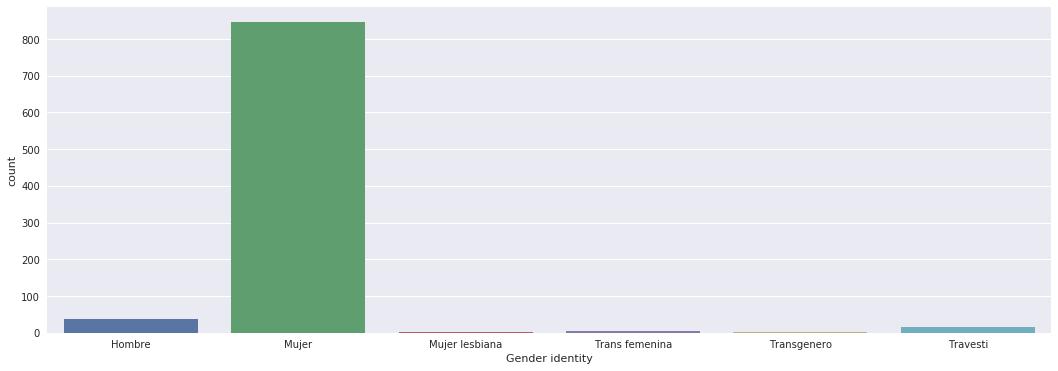

In [67]:
sns.countplot(x='Gender identity', data=df)

#### Cases per Age

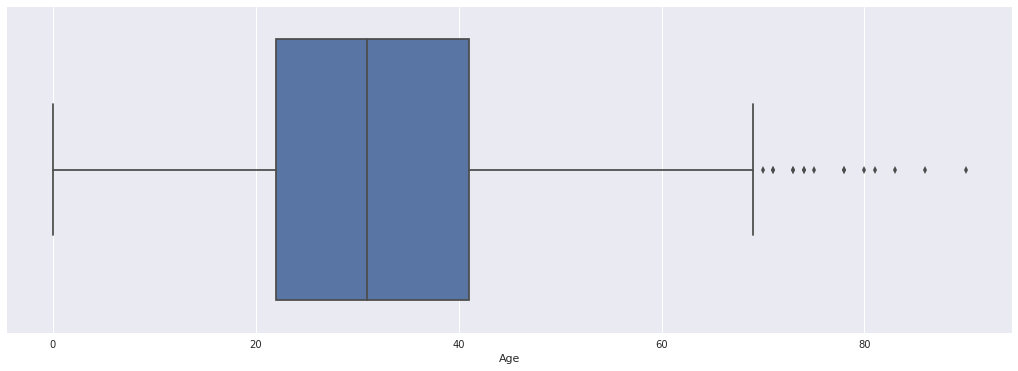

In [69]:
sns.boxplot(data=df, x='Age')

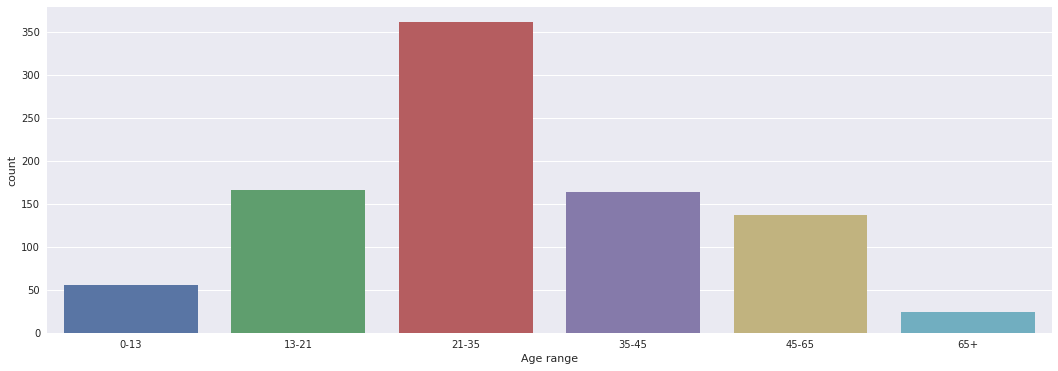

In [95]:
sns.countplot(x='Age range', data=df)

#### Cases per Victim type

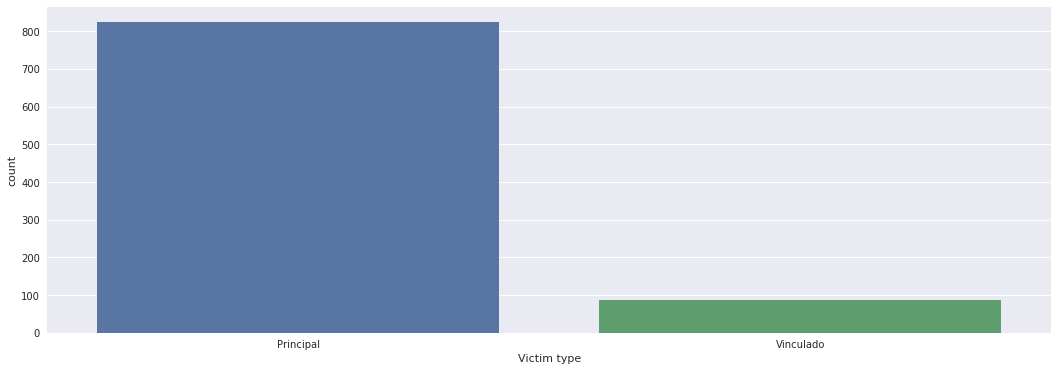

In [100]:
sns.countplot(x='Victim type', data=df)

#### Cases per year / month / day

In [104]:
2017 = (df['Date']>'2017-01-01') & (df['Date']<='2017-12-31')
print(df.loc[per_year])

     Case  Age Gender identity Victim type                Province  \
33   1078   49           Mujer   Principal                Santa Fe   
36   1074   52           Mujer   Principal              Santa Cruz   
41   1068   26           Mujer   Principal            Buenos Aires   
43   1066   26           Mujer   Principal                   Salta   
44   1065   50           Mujer   Principal              Corrientes   
46   1064   32           Mujer   Vinculado                Santa Fe   
47   1064   20          Hombre   Vinculado                Santa Fe   
48   1064   19           Mujer   Vinculado                Santa Fe   
49   1064   35           Mujer   Principal                Santa Fe   
51   1061   35           Mujer   Principal                   Jujuy   
53   1060   18           Mujer   Principal                Santa Fe   
54   1059   21           Mujer   Principal     Santiago del Estero   
56   1057   41           Mujer   Principal                   Chaco   
57   1055   53      

#### Cases per Day of week

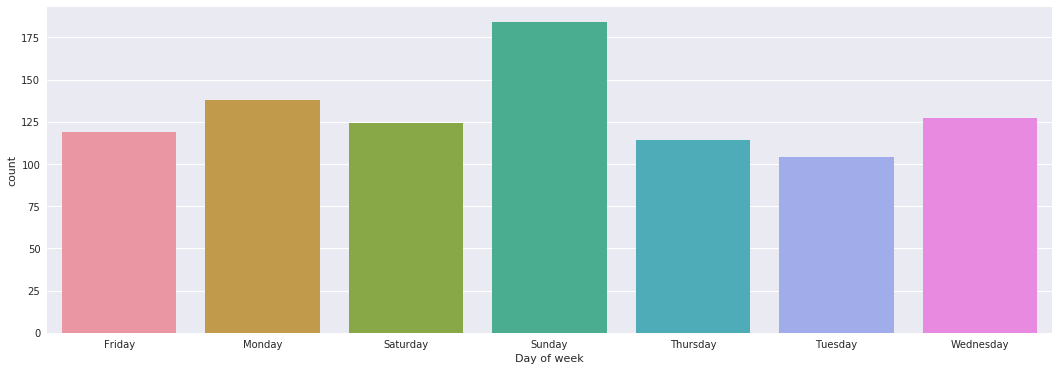

In [71]:
sns.countplot(x='Day of week', data=df)
dayWeek = sorted(dayWeek, key=k.index)
# don't know how to order the days (like the logical order we know)

### 2 variables

#### Cases by age per Province

In [110]:
df2 = df.groupby(['Province'])[['Age range']].count()
df2

,Age range
Province,
Buenos Aires,274
Catamarca,11
Chaco,38
Chubut,16
Ciudad de Buenos Aires,35
Corrientes,21
Córdoba,91
Entre Rios,40
Formosa,8


#### Amount by Gender per Province

In [ ]:
df2 = df.groupby(['Province', 'Gender identity'])[['Gender identity']].count()
df2

#### Gender by Province

In [ ]:
sns.countplot(x='Province', hue='Gender identity', data=df)
# Rotate x-labels
plt.xticks(rotation=-45)
# Can this be done by province?

In [ ]:
sns.factorplot("Gender identity", col="Age range", hue='Gender identity', col_wrap=3, kind="count", data=df)
plt.xticks(rotation=45)

#### Amount of Victim types per Day of Week

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

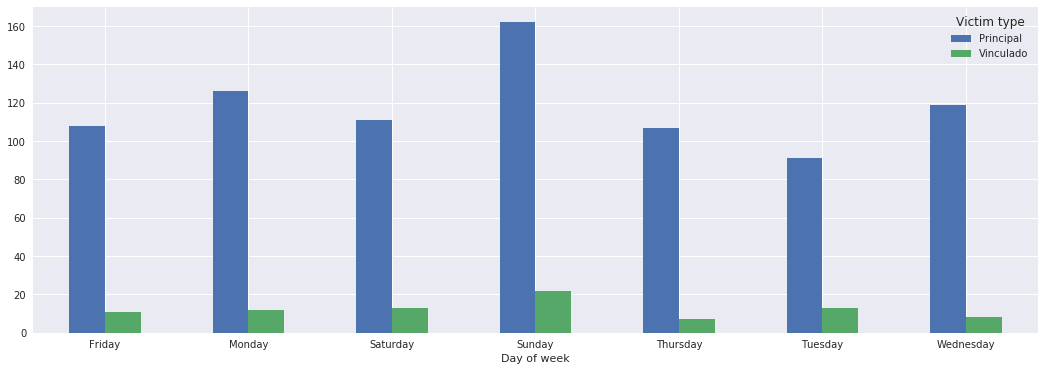

In [97]:
group_by_victim_type = df.groupby(['Day of week', 'Victim type']).size().unstack()
group_by_victim_type.plot(kind='bar')
plt.xticks(rotation='horizontal')

#### Victim types per Age

#### Amount of Victim types per gender

#### Amount of Victim types per Province

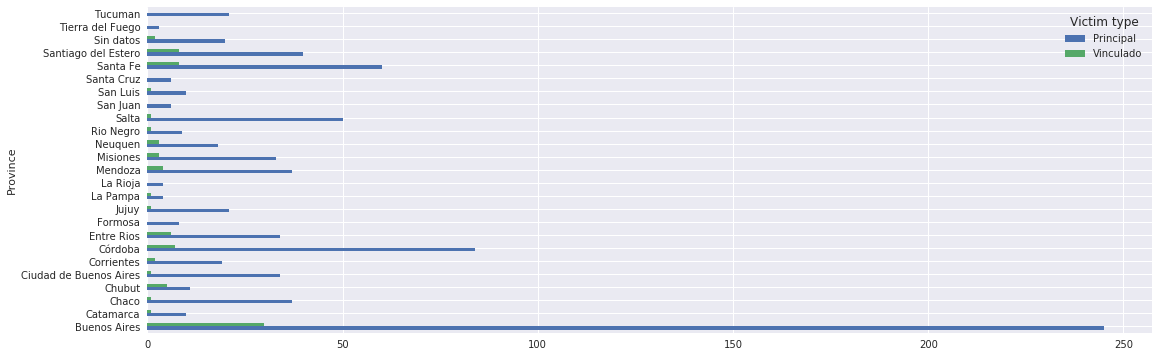

In [109]:
group_by_victim_type = df.groupby(['Province', 'Victim type']).size().unstack()
group_by_victim_type.plot(kind='barh')

#### Amount of cases by Age per Day of week

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

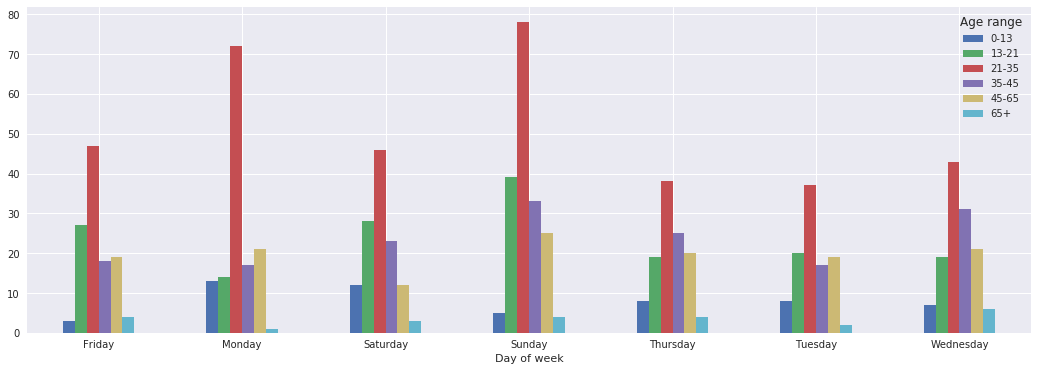

In [73]:
group_by_age_day = df.groupby(['Day of week', 'Age range']).size().unstack()
group_by_age_day.plot(kind='bar')
plt.xticks(rotation='horizontal')

In [74]:
group_by_province = df.groupby('Province')
group_by_province.plot(kind)
group_by_province['Age'].mean()

NameError: name 'kind' is not defined

In [96]:
df_wide = df.pivot(index='Age', columns='Province', values='Day of week' )
p2=sns.heatmap( df_wide )
p2

ValueError: Index contains duplicate entries, cannot reshape

In [ ]:
df['Gender identity'].value_counts()

In [ ]:
df['Age range'].groupby(df['Gender identity'])
print(df.groupby(['Age range', 'Gender identity']).groups)

In [ ]:
df_by_age_range = df.groupby('Age range')
df_by_age_range.describe().head()

In [ ]:
df2 = df.groupby(['Province', 'Gender identity'])[['Gender identity']].count()
df2